## Install tensorflow 2.0.0 with beta version 1
( always restart runtime from runtime menu whenever you install new library)

In [1]:
!pip install -q tensorflow-gpu==2.0.0 -beta1

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 450kB 45.1MB/s 
     |████████████████████████████████| 3.8MB 46.6MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [4]:
!pip install tensorboard==2.2.0

     |████████████████████████████████| 2.8MB 2.7MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-gpu 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you'll have tensorboard 2.2.0 which is incompatible.
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2


In [0]:
!pip install -q gast==0.3.3

In [0]:
!pip install -q tensorflow-gpu==2.0.0 -beta1

In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0


In [0]:
mnist=tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test, y_test)=mnist.load_data()
x_train, x_test=x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)


11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


##Building a model

In [0]:
model=tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(28,28)),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(10, activation='softmax') 
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## train the model

In [9]:
r=model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2970 - accuracy: 0.9136 - val_loss: 0.1363 - val_accuracy: 0.9591
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1401 - accuracy: 0.9584 - val_loss: 0.1047 - val_accuracy: 0.9668
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1049 - accuracy: 0.9685 - val_loss: 0.0862 - val_accuracy: 0.9730
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0870 - accuracy: 0.9724 - val_loss: 0.0781 - val_accuracy: 0.9755
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0732 - accuracy: 0.9771 - val_loss: 0.0706 - val_accuracy: 0.9787
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0622 - accuracy: 0.9797 - val_loss: 0.0746 - val_accuracy: 0.9778
Epoch 7/10
60000/60000 [============================

## plot 'loss per iteration'

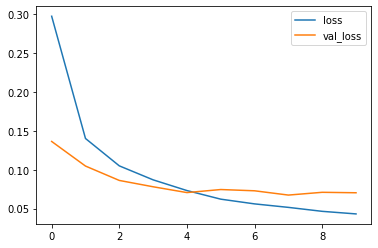

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## plot accuracy per iteration

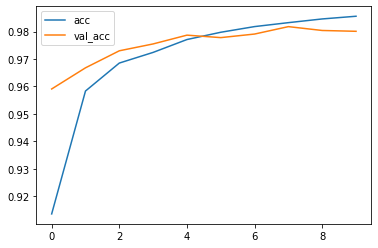

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
model.save('ANN_image_classifier_MNIST.h5')

In [0]:
!ls

In [12]:
print(model.evaluate(x_test,y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Confusion Matrix

Confusion matrix, without normalization
[[ 971    0    1    0    0    0    4    1    3    0]
 [   0 1128    3    0    0    1    2    0    1    0]
 [   4    2 1007    1    1    0    4    6    6    1]
 [   0    0    7  984    0   10    0    3    3    3]
 [   1    1    2    1  965    0    4    1    1    6]
 [   2    1    0    8    1  866    5    1    6    2]
 [   3    2    0    1    1    1  949    0    1    0]
 [   2    5   10    1    1    0    0  999    5    5]
 [   6    3    1    1    0    1    2    3  954    3]
 [   2    4    0    3   12    5    0    1    4  978]]


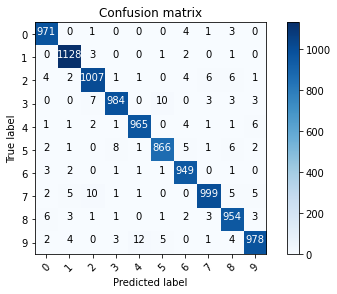

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Show some misclassified examples

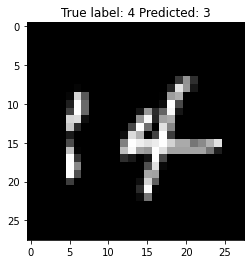

In [17]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [0]:
model.save('ANN_AMNIST_IMAGE_Classification.h5')

In [40]:
!ls

ANN_AMNIST_IMAGE_Classification.h5  eta1
ANN_image_classifier_MNIST.h5	    sample_data
